# Manual Evaluation Explorer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from textwrap import wrap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import sys
import os

# Add src to path for importing colors module
sys.path.append(os.path.abspath('../src'))
from reproscreener.colors import (
    CATEGORICAL_3_LIGHT_OPTION_1, CATEGORICAL_3_LIGHT_OPTION_2, CATEGORICAL_3_LIGHT_OPTION_3, 
    CATEGORICAL_3_LIGHT_OPTION_4, CATEGORICAL_3_LIGHT_OPTION_5, CATEGORICAL_2_LIGHT_OPTION_1, 
    CATEGORICAL_2_LIGHT_OPTION_2, CATEGORICAL_2_LIGHT_OPTION_3, CATEGORICAL_2_LIGHT_OPTION_4, 
    CATEGORICAL_2_LIGHT_OPTION_5, CATEGORICAL_3_DARK_OPTION_1, CATEGORICAL_3_DARK_OPTION_2, 
    CATEGORICAL_3_DARK_OPTION_3, CATEGORICAL_3_DARK_OPTION_4, CATEGORICAL_3_DARK_OPTION_5
)
all_columns = [
  "problem",
  "problem_agreement",
  "objective",
  "objective_agreement",
  "research_method",
  "research_method_agreement",
  "research_questions",
  "research_questions_agreement",
  "pseudocode",
  "pseudocode_agreement",
  "dataset",
  "dataset_agreement",
  "hypothesis",
  "hypothesis_agreement",
  "prediction",
  "prediction_agreement",
  "code_available",
  "code_available_agreement",
  "software_dependencies",
  "software_dependencies_agreement",
  "experiment_setup",
  "experiment_setup_agreement"
]
metric_columns = [col for col in all_columns if not col.endswith("_agreement")]

repro_manuscript_metrics = ["problem", "objective", "research_method", "research_questions", "dataset", "hypothesis", "prediction", "code_available", "experiment_setup"]
repro_manuscript_metrics_display_map = {
    "problem": "Research problem",
    "objective": "Objective/ Goal",
    "research_method": "Research method",
    "research_questions": "Research questions",
    "hypothesis": "Hypothesis",
    "prediction": "Prediction",
    "code_available": "Code available",
    "dataset": "Dataset",
    "experiment_setup": "Experimental setup",
    # "software_dependencies": "Software dependencies",
}
gundersen_metrics = ["problem", "objective", "research_method", "research_questions", "pseudocode", "training_data", "validation_data", "test_data", "hypothesis", "prediction", "method_source_code", "hardware_specifications","software_dependencies", "experiment_setup"]
gundersen_metrics_display_map = {
    "problem": "Research problem",
    "objective": "Objective/ Goal",
    "research_method": "Research method",
    "research_questions": "Research questions",
    "pseudocode": "Pseudocode",
    "training_data": "Training data",
    "validation_data": "Validation data",
    "test_data": "Test data",
    "hypothesis": "Hypothesis",
    "prediction": "Prediction",
    "method_source_code": "Method source code",
    "hardware_specifications": "Hardware specifications",
    "software_dependencies": "Software dependencies",
    "experiment_setup": "Experimental setup",
}

In [2]:
import matplotlib.pyplot as plt

from highlight_text import fig_text
# font_dir = '/mnt/c/Users/adb/Desktop/stuff/fonts/'
# font_dir = '/Users/adb/Library/Mobile Documents/com~apple~CloudDocs/fonts/'
# font_name = 'IBMPlexSans-Regular.ttf'
# font_name = 'Inter-Bold.ttf'
# # font_name = 'FiraSans-Regular.ttf'
# from matplotlib import font_manager
# font_manager.fontManager.addfont('/Users/adb/Library/Fonts/AlegreyaSans-Medium.ttf')
# prop = font_manager.FontProperties(fname='/Users/adb/Library/Fonts/AlegreyaSans-Medium.ttf')
# plt.rcParams['font.sans-serif'] = prop.get_name()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Inter','Helvetica','IBM Plex Sans', 'Inter', 'Fira Sans']
# plt.rcParams['font.weight'] = 'medium'
# plt.rcParams['font.size'] = 12
plt.rcParams['text.color'] = '#1E1E1E'

thesis_figures_dir = "../../USCthesis/figures/"
presentation_figures_dir = "../../qualifying_exam_slides/present/figures/"
current_figures_dir = "../reports/figures/"

In [3]:
df_manuscript_manual = pd.read_csv("https://huggingface.co/datasets/adbX/reproscreener_manual_evaluations/resolve/main/manuscript.csv")
df_manuscript_manual.set_index("paper_id", inplace=True)
df_manuscript_manual = df_manuscript_manual.drop(
    columns=["evaluation_type", "source_file"]
    + [col for col in df_manuscript_manual.columns if "_description" in col]
)
df_manuscript_manual = df_manuscript_manual.rename(columns={"code_available_in_article": "code_available"})
df_manuscript_manual.head()

,paper_url,notes,empirical_dataset,code_available,papers_with_code_link_available,papers_with_code_link_matches,result_replication_code_available,is_package,has_wrapper_scripts,hardware_specifications_provided,...,will_it_reproduce_desc,problem,objective,research_method,research_questions,pseudocode,dataset,hypothesis,prediction,experiment_setup
paper_id,,,,,,,,,,,,,,,,,,,,,
1606.04671,https://arxiv.org/pdf/1606.04671.pdf,No code or data released,NaN,False,False,False,NaN,NaN,False,NaN,...,NaN,False,False,False,False,False,False,False,False,True
1903.09668,https://arxiv.org/pdf/1903.09668.pdf,No code or data released,NaN,False,False,False,NaN,NaN,False,NaN,...,NaN,False,False,False,False,True,False,False,False,True
1904.10554,https://arxiv.org/pdf/1904.10554.pdf,No code or data released,NaN,False,False,False,NaN,NaN,False,NaN,...,NaN,False,False,False,False,True,False,False,False,True
1908.05659,https://arxiv.org/pdf/1908.05659.pdf,"90 page review, no experiments, mostly math",NaN,False,False,False,NaN,NaN,False,NaN,...,NaN,False,False,False,False,False,False,False,False,False
1909.00931,https://arxiv.org/pdf/1909.00931.pdf,NaN,NaN,True,True,True,NaN,NaN,False,True,...,NaN,True,False,False,False,True,True,True,False,True


## Reproscreener (regex) vs. Manual evaluations of full manuscripts

In [4]:
df_manuscript_regex = pd.read_csv("https://huggingface.co/datasets/adbX/reproscreener_manual_evaluations/resolve/main/repro_eval_tex.csv")
df_manuscript_regex = df_manuscript_regex.rename(columns={"method_source_code": "code_available", "id": "paper_id"})
df_manuscript_regex.set_index("paper_id", inplace=True)
df_manuscript_regex['dataset'] = df_manuscript_regex['training_data'].astype(bool) + df_manuscript_regex['test_data'].astype(bool) + df_manuscript_regex['validation_data'].astype(bool) + df_manuscript_regex['training_data'].astype(bool)
df_manuscript_regex = df_manuscript_regex.drop(columns=["index","training_data", "test_data", "validation_data", "title"])
df_manuscript_regex[metric_columns] = df_manuscript_regex[metric_columns].astype(bool)

In [5]:
common_idx = df_manuscript_manual.index.intersection(df_manuscript_regex.index)
manual_bool = df_manuscript_manual.loc[common_idx, metric_columns].astype(bool)
regex_bool = df_manuscript_regex.loc[common_idx, metric_columns].astype(bool)

results_manuscript = {}
for manuscript_metric in metric_columns:
    manuscript_regex_vals = regex_bool[manuscript_metric]
    manuscript_manual_vals = manual_bool[manuscript_metric]

    results_manuscript[manuscript_metric] = {
        'regex_sum': int(manuscript_regex_vals.sum()),
        'manual_sum': int(manuscript_manual_vals.sum()),
        'regex_proportion': float(manuscript_regex_vals.mean()),
        'regex_manual_agreement': float((manuscript_regex_vals == manuscript_manual_vals).mean()),
        'manual_proportion': float(manuscript_manual_vals.mean()),
        'total_n': int(len(manuscript_regex_vals))
    }

manuscript_results_df = pd.DataFrame(results_manuscript).T

tab_decimal_manu = manuscript_results_df
tab_percent_manu = manuscript_results_df.copy()
tab_percent_manu['regex_proportion'] = tab_percent_manu['regex_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_manu['manual_proportion'] = tab_percent_manu['manual_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_manu['regex_manual_agreement'] = tab_percent_manu['regex_manual_agreement'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_manu

,regex_sum,manual_sum,regex_proportion,regex_manual_agreement,manual_proportion,total_n
problem,44.0,15.0,88%,38%,30%,50.0
objective,39.0,4.0,78%,30%,8%,50.0
research_method,43.0,10.0,86%,30%,20%,50.0
research_questions,45.0,3.0,90%,16%,6%,50.0
pseudocode,7.0,22.0,14%,62%,44%,50.0
dataset,19.0,31.0,38%,48%,62%,50.0
hypothesis,21.0,8.0,42%,62%,16%,50.0
prediction,34.0,0.0,68%,32%,0%,50.0
code_available,23.0,22.0,46%,82%,44%,50.0
software_dependencies,0.0,14.0,0%,72%,28%,50.0


## Reproscreener (regex) vs. Manual evaluations of abstracts

In [6]:
# Load regex results for abstracts computed locally
df_abstract_regex = pd.read_csv("../reports/tables/abstract_regex_gs.csv")
df_abstract_regex = df_abstract_regex.set_index("paper_id")
# Ensure boolean dtype for metrics
available_cols = [c for c in metric_columns if c in df_abstract_regex.columns]
df_abstract_regex[available_cols] = df_abstract_regex[available_cols].astype(bool)
df_abstract_regex.head()

,problem,objective,research_method,research_questions,pseudocode,dataset,hypothesis,prediction,code_available,software_dependencies,experiment_setup
paper_id,,,,,,,,,,,
1606.04671,False,False,False,False,False,False,False,False,False,False,False
1903.09668,False,False,True,True,False,False,False,True,False,False,False
1904.10554,False,False,False,True,False,False,False,False,False,False,False
1908.05659,False,False,False,True,False,False,False,False,False,False,False
1909.00931,False,False,True,True,False,False,False,False,False,False,False


In [7]:
# Load GPT agreement for abstracts and derive manual columns from agreement
df_abs_gpt_agreement = pd.read_csv("https://huggingface.co/datasets/adbX/reproscreener_manual_evaluations/resolve/main/agreement_gpt.csv")

# Clean up columns - exclude metadata and description columns
df_abs_gpt_agreement = df_abs_gpt_agreement.set_index("paper_id")
df_abs_gpt_agreement = df_abs_gpt_agreement.drop(
    columns=["evaluation_type", "source_file"]
    + [col for col in df_abs_gpt_agreement.columns if "_description" in col]
)

# Remove gpt_ prefix from column names
df_abs_gpt_agreement = df_abs_gpt_agreement.rename(
    columns={
        col: col.replace("gpt_", "")
        for col in df_abs_gpt_agreement.columns
        if col.startswith("gpt_")
    }
)

# Compute manual_<metric> using agreement flip rule
for abs_metric in metric_columns:
    abs_agreement_col = f"{abs_metric}_agreement"
    if abs_metric in df_abs_gpt_agreement.columns and abs_agreement_col in df_abs_gpt_agreement.columns:
        abs_gpt_vals = df_abs_gpt_agreement[abs_metric].astype(bool)
        abs_agreement_vals = df_abs_gpt_agreement[abs_agreement_col]
        abs_manual_vals = np.where(abs_agreement_vals == 1, abs_gpt_vals, ~abs_gpt_vals)
        df_abs_gpt_agreement[f"manual_{abs_metric}"] = abs_manual_vals.astype(bool)

In [8]:
# Build manual abstract evaluations from df_abs_gpt_agreement manual_ columns
abs_manual_cols_map = {
    f"manual_{m}": m for m in metric_columns if f"manual_{m}" in df_abs_gpt_agreement.columns
}
df_abstract_manual = df_abs_gpt_agreement[list(abs_manual_cols_map.keys())].rename(columns=abs_manual_cols_map)
# Ensure boolean dtype
df_abstract_manual = df_abstract_manual.astype(bool)

In [9]:
# Align indices and compute agreement for abstracts
common_idx_abs = df_abstract_manual.index.intersection(df_abstract_regex.index)
manual_bool_abs = df_abstract_manual.loc[common_idx_abs]
regex_bool_abs = df_abstract_regex.loc[common_idx_abs]

# abstract_metrics = [m for m in metric_columns if m in manual_bool_abs.columns and m in regex_bool_abs.columns]

results_abs = {}
for metric in metric_columns:
    regex_vals = regex_bool_abs[metric].astype(bool)
    manual_vals = manual_bool_abs[metric].astype(bool)

    results_abs[metric] = {
        'regex_sum': int(regex_vals.sum()),
        'manual_sum': int(manual_vals.sum()),
        'regex_proportion': float(regex_vals.mean()),
        'regex_manual_agreement': float((regex_vals == manual_vals).mean()),
        'manual_proportion': float(manual_vals.mean()),
        'total_n': int(len(regex_vals)),
    }

abstract_results_regex_df = pd.DataFrame(results_abs).T

tab_decimal_abs = abstract_results_regex_df
tab_percent_abs = abstract_results_regex_df.copy()
tab_percent_abs['regex_proportion'] = tab_percent_abs['regex_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_abs['manual_proportion'] = tab_percent_abs['manual_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_abs['regex_manual_agreement'] = tab_percent_abs['regex_manual_agreement'].mul(100).round(0).astype(int).astype(str).add('%')

tab_percent_abs

,regex_sum,manual_sum,regex_proportion,regex_manual_agreement,manual_proportion,total_n
problem,12.0,41.0,24%,38%,82%,50.0
objective,4.0,44.0,8%,20%,88%,50.0
research_method,20.0,22.0,40%,56%,44%,50.0
research_questions,13.0,4.0,26%,70%,8%,50.0
pseudocode,0.0,0.0,0%,100%,0%,50.0
dataset,1.0,6.0,2%,86%,12%,50.0
hypothesis,0.0,6.0,0%,88%,12%,50.0
prediction,4.0,9.0,8%,82%,18%,50.0
code_available,2.0,4.0,4%,96%,8%,50.0
software_dependencies,0.0,1.0,0%,98%,2%,50.0


## GPT-4 vs. Manual evaluations of manuscript abstracts

In [10]:
df_gpt_agreement_manu = pd.read_csv("https://huggingface.co/datasets/adbX/reproscreener_manual_evaluations/resolve/main/agreement_gpt.csv")

# Clean up columns - exclude metadata and description columns
# Make "paper_id" the index
df_gpt_agreement_manu = df_gpt_agreement_manu.set_index("paper_id")

df_gpt_agreement_manu = df_gpt_agreement_manu.drop(
    columns=["evaluation_type", "source_file"]
    + [col for col in df_gpt_agreement_manu.columns if "_description" in col]
)

# Remove gpt_ prefix from column names
df_gpt_agreement_manu = df_gpt_agreement_manu.rename(
    columns={
        col: col.replace("gpt_", "")
        for col in df_gpt_agreement_manu.columns
        if col.startswith("gpt_")
    }
)

results = {}
for manu_metric in metric_columns:
    gpt_col = manu_metric
    agreement_col = f"{manu_metric}_agreement"

    if agreement_col in df_gpt_agreement_manu.columns:
        gpt_vals = df_gpt_agreement_manu[gpt_col].astype(bool)
        agreement_vals = df_gpt_agreement_manu[agreement_col]

        # Calculate revised manual evaluation: keep GPT when agreement=1, invert when agreement=0
        manual_vals_gpt_abs = np.where(agreement_vals == 1, gpt_vals, ~gpt_vals)

        # Add manual_vals_gpt_abs to the agreement_gpt DataFrame
        df_gpt_agreement_manu[f"manual_{manu_metric}"] = manual_vals_gpt_abs.astype(bool)

        results[manu_metric] = {
            'gpt_sum': gpt_vals.sum(),
            'manual_sum': manual_vals_gpt_abs.sum(),
            'gpt_proportion': gpt_vals.mean(),
            'gpt_manual_agreement': agreement_vals.mean(),
            'manual_proportion': manual_vals_gpt_abs.mean(),
            'total_n': len(gpt_vals)
        }
abstract_results_gpt4_df = pd.DataFrame(results).T

tab_decimal = abstract_results_gpt4_df
tab_percent = abstract_results_gpt4_df.copy()
tab_percent['gpt_proportion'] = tab_percent['gpt_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent['manual_proportion'] = tab_percent['manual_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent['gpt_manual_agreement'] = tab_percent['gpt_manual_agreement'].mul(100).round(0).astype(int).astype(str).add('%')

# tabs = mo.ui.tabs({"percent": tab_percent, "decimal": tab_decimal})
tab_percent

,gpt_sum,manual_sum,gpt_proportion,gpt_manual_agreement,manual_proportion,total_n
problem,49.0,41.0,98%,80%,82%,50.0
objective,49.0,44.0,98%,86%,88%,50.0
research_method,47.0,22.0,94%,46%,44%,50.0
research_questions,4.0,4.0,8%,96%,8%,50.0
pseudocode,0.0,0.0,0%,100%,0%,50.0
dataset,14.0,6.0,28%,68%,12%,50.0
hypothesis,6.0,6.0,12%,88%,12%,50.0
prediction,25.0,9.0,50%,52%,18%,50.0
code_available,4.0,4.0,8%,100%,8%,50.0
software_dependencies,1.0,1.0,2%,100%,2%,50.0


In [11]:
# Load LLaMA 3.2 abstract results
df_abstract_llama32 = pd.read_csv("../../llama3/outputs_json/20250829-235938/analysis_summary_reproscreener.csv")
df_abstract_llama32 = df_abstract_llama32.set_index("paper_id")
# Ensure boolean dtype for metrics present in this dataframe
available_cols_llama32 = [c for c in metric_columns if c in df_abstract_llama32.columns]
df_abstract_llama32[available_cols_llama32] = df_abstract_llama32[available_cols_llama32].astype(bool)
# df_abstract_llama32.apply(lambda x: x.value_counts())
common_idx_abs_llama32 = df_abstract_manual.index.intersection(df_abstract_llama32.index)
manual_bool_abs_llama32 = df_abstract_manual.loc[common_idx_abs_llama32]
llama32_bool_abs = df_abstract_llama32.loc[common_idx_abs_llama32]

metrics_llama32_shared = [
    m for m in metric_columns
    if m in manual_bool_abs_llama32.columns and m in llama32_bool_abs.columns
]

results_abs_llama32 = {}
for metric_llama32 in metrics_llama32_shared:
    llama32_vals = llama32_bool_abs[metric_llama32].astype(bool)
    manual_vals_llama32 = manual_bool_abs_llama32[metric_llama32].astype(bool)

    results_abs_llama32[metric_llama32] = {
        'llama32_sum': int(llama32_vals.sum()),
        'manual_sum_llama32': int(manual_vals_llama32.sum()),
        'llama32_proportion': float(llama32_vals.mean()),
        'llama32_manual_agreement': float((llama32_vals == manual_vals_llama32).mean()),
        'manual_proportion_llama32': float(manual_vals_llama32.mean()),
        'total_n_llama32': int(len(llama32_vals)),
    }

abstract_results_llama32_df = pd.DataFrame(results_abs_llama32).T

tab_decimal_abs_llama32 = abstract_results_llama32_df
tab_percent_abs_llama32 = abstract_results_llama32_df.copy()
tab_percent_abs_llama32['llama32_proportion'] = tab_percent_abs_llama32['llama32_proportion'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_abs_llama32['manual_proportion_llama32'] = tab_percent_abs_llama32['manual_proportion_llama32'].mul(100).round(0).astype(int).astype(str).add('%')
tab_percent_abs_llama32['llama32_manual_agreement'] = tab_percent_abs_llama32['llama32_manual_agreement'].mul(100).round(0).astype(int).astype(str).add('%')

tab_percent_abs_llama32

,llama32_sum,manual_sum_llama32,llama32_proportion,llama32_manual_agreement,manual_proportion_llama32,total_n_llama32
problem,41.0,41.0,82%,72%,82%,50.0
objective,14.0,44.0,28%,36%,88%,50.0
research_method,7.0,22.0,14%,54%,44%,50.0
research_questions,7.0,4.0,14%,86%,8%,50.0
pseudocode,0.0,0.0,0%,100%,0%,50.0
dataset,1.0,6.0,2%,90%,12%,50.0
hypothesis,2.0,6.0,4%,84%,12%,50.0
prediction,5.0,9.0,10%,80%,18%,50.0
code_available,3.0,4.0,6%,98%,8%,50.0
software_dependencies,0.0,1.0,0%,98%,2%,50.0


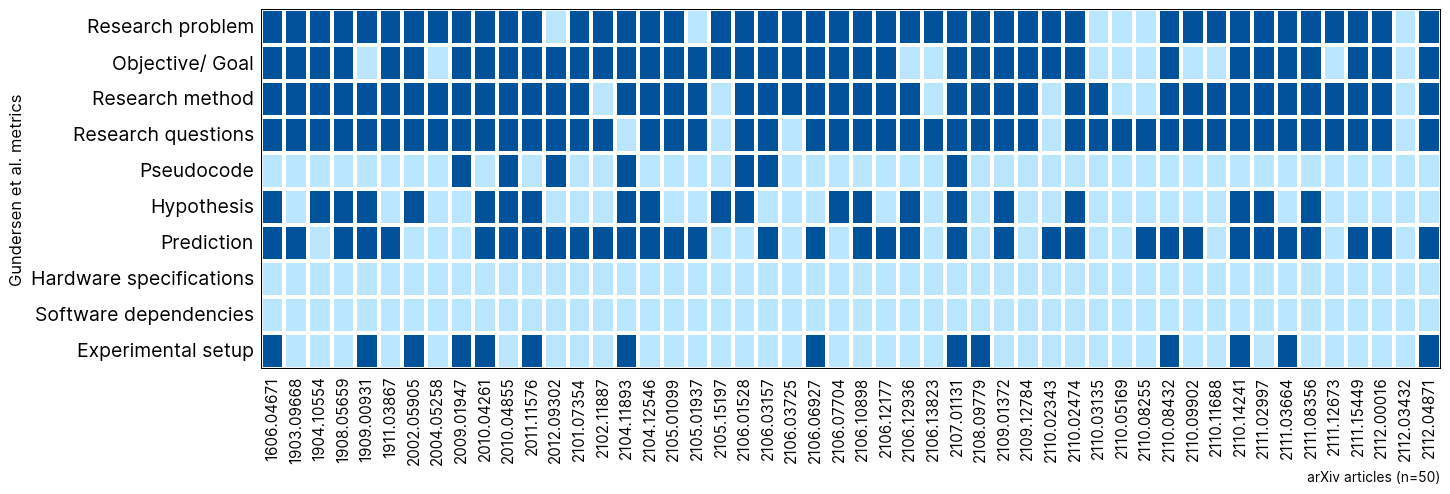

In [12]:
def plot_heatmap_regex(metrics_display_map):
    # Filter to only include metrics in gundersen_metrics
    df_manuscript_regex_gundersen = pd.read_csv("https://huggingface.co/datasets/adbX/reproscreener_manual_evaluations/resolve/main/repro_eval_tex.csv")
    df_manuscript_regex_gundersen = df_manuscript_regex_gundersen.rename(columns={"id": "paper_id"})
    df_manuscript_regex_gundersen.set_index("paper_id", inplace=True)
    df_manuscript_regex_gundersen = df_manuscript_regex_gundersen.drop(columns=["index", "title"])
    df_manuscript_regex_gundersen[gundersen_metrics] = df_manuscript_regex_gundersen[gundersen_metrics].astype(bool)

    available_gundersen_metrics = [m for m in gundersen_metrics if m in df_manuscript_regex.columns]
    
    # Metrics on rows, papers on columns
    heatmap_df = df_manuscript_regex[available_gundersen_metrics].astype(float).T
    heatmap_df.index = [gundersen_metrics_display_map.get(m, m.replace("_", " ").title()) for m in heatmap_df.index]

    # custom_cmap = ListedColormap(["#FFF0F0", "#E74C3C"])
    # custom_cmap = ListedColormap(["#DFF3E3", "#3D9963"])
    custom_cmap = ListedColormap(["#bae6ff", "#00539a"])

    fig, ax = plt.subplots(figsize=(14, 5), tight_layout={"pad": 1.5})

    # Black frame
    ax.axhline(y=0, color="k", linewidth=1.5)
    ax.axvline(x=0, color="k", linewidth=1.5)
    ax.axhline(y=heatmap_df.shape[0], color="k", linewidth=1.5)
    ax.axvline(x=heatmap_df.shape[1], color="k", linewidth=1.5)

    sns.heatmap(heatmap_df, cmap=custom_cmap, cbar=False, linewidths=1.5, ax=ax)

    ax.set_ylabel("Gundersen et al. metrics", fontsize=12)
    ax.set_xlabel("arXiv articles (n=50)",  rotation=360, loc="right")

    plt.subplots_adjust(top=0.95, left=0.15, right=0.95)
    plt.tight_layout()
    plt.tick_params(axis='both', size=0, pad=5)
    
    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)
    plt.savefig(current_figures_dir + "hm_manuscript_regex.png", dpi=1280, bbox_inches="tight")
    plt.savefig(thesis_figures_dir + "hm_manuscript_regex.png", dpi=1280, bbox_inches="tight")
    plt.savefig(presentation_figures_dir + "hm_manuscript_regex.png", dpi=1280, bbox_inches="tight")

    plt.show()

plot_heatmap_regex(gundersen_metrics_display_map)

In [13]:
def plot_heatmap_llama(metrics_display_map):
    # Filter to only include metrics in repro_manuscript_metrics
    available_repro_metrics = [m for m in repro_manuscript_metrics if m in df_abstract_llama32.columns]
    
    # Metrics on rows, papers on columns
    heatmap_df = df_abstract_llama32[available_repro_metrics].astype(float).T
    heatmap_df.index = [repro_manuscript_metrics_display_map.get(m, m.replace("_", " ").title()) for m in heatmap_df.index]

    # Two-color scheme (empty, filled)
    # custom_cmap = ListedColormap(["#FFF0F0", "#E74C3C"])
    # custom_cmap = ListedColormap(["#DFF3E3", "#3D9963"])
    custom_cmap = ListedColormap(["#e8daff", "#6929c4"])

    fig, ax = plt.subplots(figsize=(12, 4), tight_layout={"pad": 1.5})

    # Black frame
    ax.axhline(y=0, color="k", linewidth=1.5)
    ax.axvline(x=0, color="k", linewidth=1.5)
    ax.axhline(y=heatmap_df.shape[0], color="k", linewidth=1.5)
    ax.axvline(x=heatmap_df.shape[1], color="k", linewidth=1.5)

    sns.heatmap(heatmap_df, cmap=custom_cmap, cbar=False, linewidths=1.5, ax=ax)

    ax.set_ylabel("ReproManuscriptMetrics", fontsize=12)
    ax.set_xlabel("arXiv articles (n=50)",  rotation=360, loc="right")
    
    plt.subplots_adjust(top=0.95, left=0.15, right=0.95)
    plt.tight_layout()
    plt.tick_params(axis='both', size=0, pad=5)
    
    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)
    plt.savefig(current_figures_dir + "hm_abstract_llama32.png", dpi=1280, bbox_inches="tight")
    plt.savefig(thesis_figures_dir + "hm_abstract_llama32.png", dpi=1280, bbox_inches="tight")
    plt.savefig(presentation_figures_dir + "hm_abstract_llama32.png", dpi=1280, bbox_inches="tight")

    plt.show()
# plot_heatmap_llama(repro_manuscript_metrics_display_map)

## Abstract evaluation comparison

In [14]:
# plot all 3 agreement metrics
abstract_results_regex_df.regex_manual_agreement
abstract_results_gpt4_df.gpt_manual_agreement
abstract_results_llama32_df.llama32_manual_agreement

merged_agreement_results = pd.DataFrame({
    'Regex': abstract_results_regex_df['regex_manual_agreement'],
    'GPT-4': abstract_results_gpt4_df['gpt_manual_agreement'],
    'LLaMA 3.2': abstract_results_llama32_df['llama32_manual_agreement']
})
merged_agreement_results.index.name = 'Metric'
merged_agreement_results_melt = merged_agreement_results.reset_index().melt(id_vars='Metric', var_name='Method', value_name='Agreement')
merged_agreement_results

,Regex,GPT-4,LLaMA 3.2
Metric,,,
problem,0.38,0.80,0.72
objective,0.20,0.86,0.36
research_method,0.56,0.46,0.54
research_questions,0.70,0.96,0.86
pseudocode,1.00,1.00,1.00
dataset,0.86,0.68,0.90
hypothesis,0.88,0.88,0.84
prediction,0.82,0.52,0.80
code_available,0.96,1.00,0.98


In [15]:
merged_agreement_results_manual = pd.DataFrame({
    'Regex': tab_percent_abs['regex_manual_agreement'],
    'GPT-4': tab_percent['gpt_manual_agreement'],
    'LLaMA 3.2': tab_percent_abs_llama32['llama32_manual_agreement'],
    '% human eval. found (n=50)': tab_percent.manual_proportion,
    '# human eval. found (n=50)': tab_percent.manual_sum
})
merged_agreement_results_manual

,Regex,GPT-4,LLaMA 3.2,% human eval. found (n=50),# human eval. found (n=50)
problem,38%,80%,72%,82%,41.0
objective,20%,86%,36%,88%,44.0
research_method,56%,46%,54%,44%,22.0
research_questions,70%,96%,86%,8%,4.0
pseudocode,100%,100%,100%,0%,0.0
dataset,86%,68%,90%,12%,6.0
hypothesis,88%,88%,84%,12%,6.0
prediction,82%,52%,80%,18%,9.0
code_available,96%,100%,98%,8%,4.0
software_dependencies,98%,100%,98%,2%,1.0


### Initial gundersen heatmap (grouped)

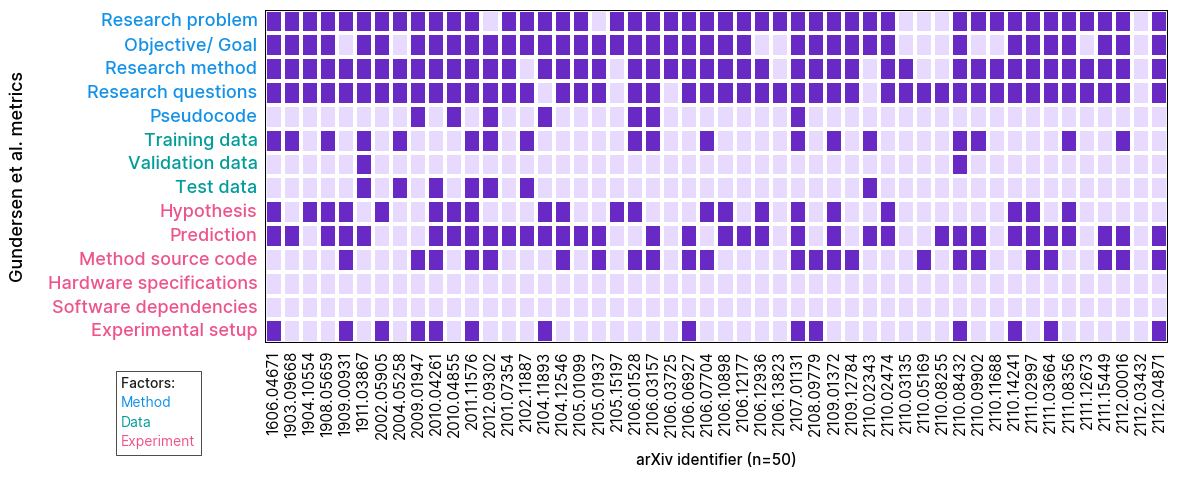

In [ ]:
def plot_heatmap_regex_grouped(metrics_display_map, color_palette=CATEGORICAL_3_LIGHT_OPTION_5, values_cmap=ListedColormap(["#edf5ff", "#002d9c"])):
    # Group colors from provided palette
    colors_3group = {
        "Method": color_palette[0],
        "Data": color_palette[1],
        "Experiment": color_palette[2],
    }

    df_manuscript_regex_gundersen = pd.read_csv("https://huggingface.co/datasets/adbX/reproscreener_manual_evaluations/resolve/main/repro_eval_tex.csv")
    df_manuscript_regex_gundersen = df_manuscript_regex_gundersen.rename(columns={"id": "paper_id"})
    df_manuscript_regex_gundersen.set_index("paper_id", inplace=True)
    df_manuscript_regex_gundersen = df_manuscript_regex_gundersen.drop(columns=["index", "title"])
    df_manuscript_regex_gundersen[gundersen_metrics] = df_manuscript_regex_gundersen[gundersen_metrics].astype(bool)

    available_gundersen_metrics = [m for m in gundersen_metrics if m in df_manuscript_regex_gundersen.columns]

    # Metric groups for Gundersen metrics
    gundersen_metric_groups = {
        "Method": ["problem", "objective", "research_method", "research_questions", "pseudocode"],
        "Data": ["training_data", "validation_data", "test_data"],
        "Experiment": ["hypothesis", "prediction", "method_source_code", "hardware_specifications", "software_dependencies", "experiment_setup"],
    }

    # Metrics on rows, papers on columns
    heatmap_df = df_manuscript_regex_gundersen[available_gundersen_metrics].astype(float).T
    heatmap_df.index = [gundersen_metrics_display_map.get(m, m.replace("_", " ").title()) for m in heatmap_df.index]

    fig, ax = plt.subplots(figsize=(12, 5), tight_layout={"pad": 1.5})

    # Black frame
    ax.axhline(y=0, color="k", linewidth=1.5)
    ax.axvline(x=0, color="k", linewidth=1.5)
    ax.axhline(y=heatmap_df.shape[0], color="k", linewidth=1.5)
    ax.axvline(x=heatmap_df.shape[1], color="k", linewidth=1.5)

    sns.heatmap(heatmap_df, cmap=values_cmap, cbar=False, linewidths=1.5, ax=ax)

    # Color code the y-axis labels by metric group
    for i, (metric_key, display_name) in enumerate(zip(available_gundersen_metrics, heatmap_df.index)):
        for group_name, group_metrics in gundersen_metric_groups.items():
            if metric_key in group_metrics:
                ax.get_yticklabels()[i].set_color(colors_3group[group_name])
                # ax.get_yticklabels()[i].set_weight("medium")
                break

    # Axis label styles aligned with llama version
    ax.set_ylabel("Gundersen et al. metrics", fontsize=13, fontweight="medium", labelpad=15)
    ax.set_xlabel("arXiv identifier (n=50)", fontsize=11, fontweight="medium", rotation=360, loc="center", labelpad=10)

    # Style to match llama: hide spines and adjust ticks
    ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
    ax.tick_params(axis="both", size=0, pad=5)

    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(13)

    legend_string = "<Factors: >" + " ".join([f"\n<{group}>" for group in gundersen_metric_groups.keys()])
    fig_text(
        x=.11,
        y=0.225,
        s= legend_string,
        highlight_textprops=[{"fontweight":"medium"}]
            + [{"color": colors_3group[g], "fontweight": "normal"} for g in gundersen_metric_groups.keys()],
        annotationbbox_kw={'frameon': True, 'pad': .4, 
                           'bboxprops': {'linewidth': .5}},
    )

    plt.subplots_adjust(top=0.95, left=0.15, right=0.85)

    plt.savefig(current_figures_dir + "hm_manuscript_regex_grouped.png", dpi=1280, bbox_inches="tight")
    plt.savefig(thesis_figures_dir + "hm_manuscript_regex_grouped.png", dpi=1280, bbox_inches="tight")
    plt.savefig(presentation_figures_dir + "hm_manuscript_regex_grouped.png", dpi=1280, bbox_inches="tight")

    plt.show()
plot_heatmap_regex_grouped(
    gundersen_metrics_display_map,
    color_palette=["#1192e8", "#009d9a", "#ee538b"],  # or any 3-color palette [m, d, e]
    values_cmap=ListedColormap(["#e8daff", "#6929c4"])  # for a purple theme
)

### LLama grouped heatmap

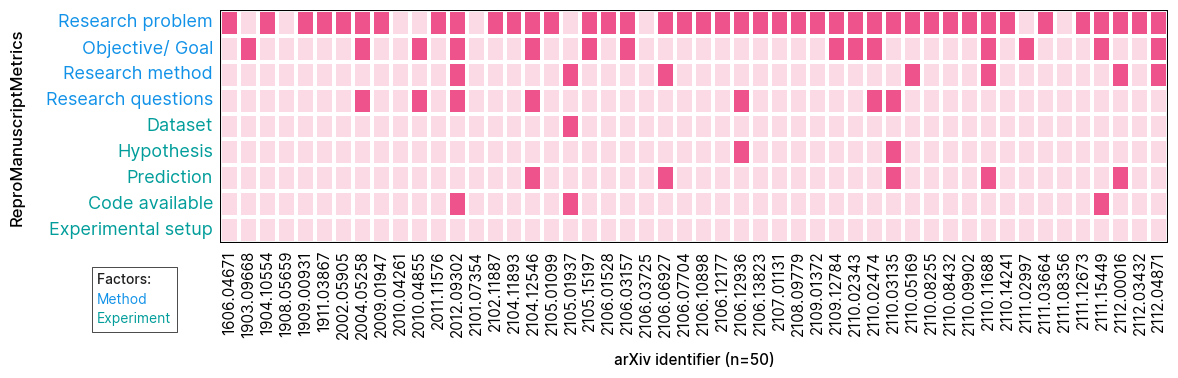

In [ ]:
def plot_heatmap_llama_grouped(metrics_display_map, color_palette=CATEGORICAL_2_LIGHT_OPTION_1):
    available_repro_metrics = [m for m in repro_manuscript_metrics if m in df_abstract_llama32.columns]
    
    # Define metric groups for ReproManuscript metrics
    repro_manuscript_metric_groups = {
        "Method": ["problem", "objective", "research_method", "research_questions"],
        "Experiment": ["hypothesis", "prediction", "code_available", "dataset", "experiment_setup"]
    }
    
    # Color mapping for groups using input palette
    colors_2group = {"Method": color_palette[0], "Experiment": color_palette[1]}
    
    # Metrics on rows, papers on columns
    heatmap_df = df_abstract_llama32[available_repro_metrics].astype(float).T
    heatmap_df.index = [repro_manuscript_metrics_display_map.get(m, m.replace("_", " ").title()) for m in heatmap_df.index]

    # Custom colormap
    custom_cmap = ListedColormap(["#e8daff", "#6929c4"])

    fig, ax = plt.subplots(figsize=(12, 4), tight_layout={"pad": 1.5})

    # Black frame
    ax.axhline(y=0, color="k", linewidth=1.5)
    ax.axvline(x=0, color="k", linewidth=1.5)
    ax.axhline(y=heatmap_df.shape[0], color="k", linewidth=1.5)
    ax.axvline(x=heatmap_df.shape[1], color="k", linewidth=1.5)

    sns.heatmap(heatmap_df, cmap=custom_cmap, cbar=False, linewidths=1.5, ax=ax)

    # Color code the y-axis labels by metric group
    for i, (metric_key, display_name) in enumerate(zip(available_repro_metrics, heatmap_df.index)):
        # Find which group this metric belongs to
        for group_name, group_metrics in repro_manuscript_metric_groups.items():
            if metric_key in group_metrics:
                color = colors_2group[group_name]
                ax.get_yticklabels()[i].set_color(color)
                ax.get_yticklabels()[i].set_weight('bold')
                break

    ax.set_ylabel("ReproManuscriptMetrics", fontsize=12)
    ax.set_xlabel("arXiv articles (n=50)",  rotation=360, loc="right")
    ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
    ax.tick_params(axis='both', size=0, pad=5)
    
    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)

    # Title using fig.text style
    fig.text(x=0.02, y=1, s="LLaMA 3.2 evaluation results on manuscript abstracts", size=14, fontweight="bold")
    
    # Legend using fig_text style
    legend_string = " ".join([f"<{group}>" for group in repro_manuscript_metric_groups.keys()])
    fig_text(
        x=0.02,
        y=0.97,
        s=legend_string,
        highlight_textprops=[
            {"color": colors_2group["Method"], "fontweight": "bold"},
            {"color": colors_2group["Experiment"], "fontweight": "bold"},
        ],
    )
    
    plt.subplots_adjust(top=0.95, left=0.15, right=0.85)
    plt.tight_layout()
        
    plt.savefig(current_figures_dir + "hm_abstract_llama32_grouped.png", dpi=1280, bbox_inches="tight")
    plt.savefig(thesis_figures_dir + "hm_abstract_llama32_grouped.png", dpi=1280, bbox_inches="tight")
    plt.savefig(presentation_figures_dir + "hm_abstract_llama32_grouped.png", dpi=1280, bbox_inches="tight")

    plt.show()
plot_heatmap_llama_grouped(repro_manuscript_metrics_display_map)

### Agreement bar plots

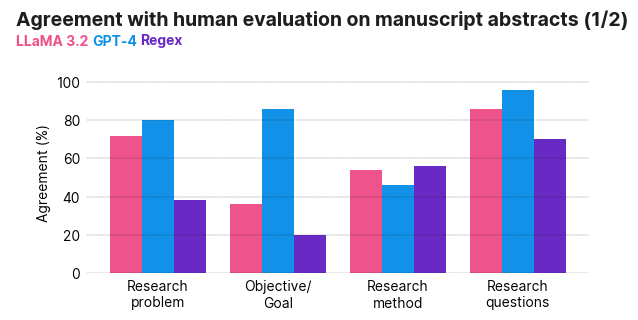

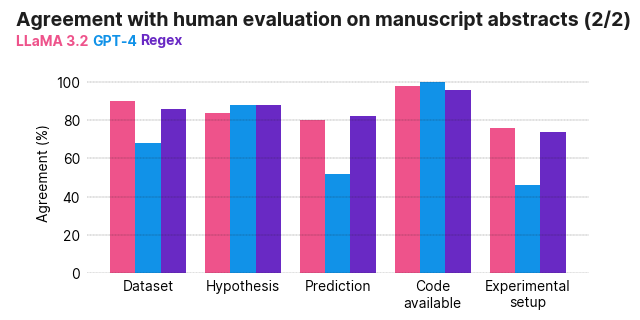

In [18]:
def plot_agreement_by_metric_mpl(metrics_display_map, methods, color_palette=CATEGORICAL_3_LIGHT_OPTION_4):
    df_sorted = merged_agreement_results_melt.sort_values(["Metric","Method"])

    colors = {method: color_palette[i] for i, method in enumerate(methods)}
    legend_string = " ".join([f"<{method}>" for method in methods])
    
    groups = [
        ["problem", "objective", "research_method", "research_questions"],
        ["dataset", "hypothesis", "prediction","code_available","experiment_setup"],
    ]
    width = 0.8 / len(methods)
    for idx, group in enumerate(groups, start=1):
        x = np.arange(len(group))
        fig, ax = plt.subplots(figsize=(6, 3))
        for i, m in enumerate(methods):
            sub = df_sorted[df_sorted["Method"] == m].set_index("Metric").reindex(group)
            ax.bar(x + i*width - (len(methods)-1)*width/2, sub["Agreement"].values, width, label=m, color=colors[m])

        ax.set_xticks(x)
        ax.set_xticklabels([ "\n".join(wrap(metrics_display_map[m], 12)) for m in group ])
        ax.set_ylim(0, 1.05)
        ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_yticklabels(['0', '20', '40', '60', '80', '100'])
        ax.set_ylabel('Agreement (%)')
        ax.yaxis.grid(True, linestyle="--", linewidth=0.2, color="#1E1E1E", alpha=1)
        ax.tick_params(axis="x", size=0, pad=5)
        ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
        ax.tick_params(axis="y", size=0, pad=5)

        fig.text(x=0.02, y=1, s=f"Agreement with human evaluation on manuscript abstracts ({idx}/{len(groups)})", size=14, fontweight="bold")
        fig_text(
            x=0.02,
            y=0.97,
            s=legend_string,
            highlight_textprops=[
                {"color": colors["LLaMA 3.2"], "fontweight": "bold"},
                {"color": colors["GPT-4"], "fontweight": "bold"},
                {"color": colors["Regex"], "fontweight": "bold"},
            ],
        )
        plt.tight_layout()
        plt.savefig(current_figures_dir + f"agreements_on_abstracts_row{idx}.png", dpi=320, bbox_inches="tight")
        plt.savefig(thesis_figures_dir + f"agreements_on_abstracts_row{idx}.png", dpi=320, bbox_inches="tight")
        plt.savefig(presentation_figures_dir + f"agreements_on_abstracts_row{idx}.png", dpi=320, bbox_inches="tight")
        plt.show()
        
method_order = ["LLaMA 3.2", "GPT-4", "Regex"]
plot_agreement_by_metric_mpl(repro_manuscript_metrics_display_map, method_order, color_palette=CATEGORICAL_3_LIGHT_OPTION_4)